In [1]:
import csv
import random
import time

# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Neuronale Netze - Adaline

*Gruppenmitglieder: Dejan Sovic, Lucas Wessel, Timo Schmitt, Simon Gärtner*


## Aufgabenstellung

### Kleines Projekt 02: Neuronale Netzte - Adaline

In diesem Projekt betrachten wir das Adaline (ADAptive LInear NEuron), ein künstliches Neuron. Das Adaline besitzt die Parameter $w_0, w_1,... w_n \in \mathbb R$ und stellt eine mathematische Funktion 

 <p style="text-align: center;">$g: \mathbb R^n \rightarrow \{-1,1\}, g(x)=\alpha(f(x))$</p>

mit

 <p style="text-align: center;">$f: \mathbb R^n \rightarrow \mathbb R, f(x) = w_0 \times 1 + \sum_{j=1}^n{w_j\times x_j}$</p>

und

 <p style="text-align: center;">$\alpha: \mathbb R \rightarrow \{-1,1\}, \alpha (x) = \begin{cases} -1 \quad falls, x \leq 0 \\ 1, \quad falls, x > 0 \end{cases}$</p>

dar. Eine schematische Darstellung eines Adaline kann der folgenden Abbildung entnommen werden. 

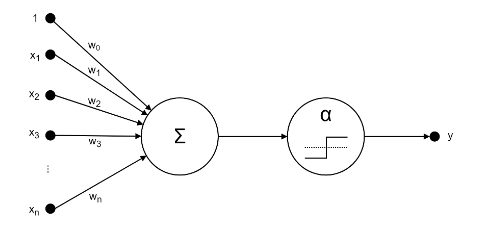

Das Adaline kann für die Klassifikation verwendet werden, d.h. es ordnet einen Datenpunkt $x \in \mathbb R^n$ eine der beiden Klassen positiv 1 und negativ -1 zu. Durch Anpassungen der Parameter $w_i$ an einen gegebenen Datensatz mit k Datenpunkten

 <p style="text-align: center;">$D=\{(x^{(i)}, y^{(i)}) \mid 1 \leq i \leq k\}\subseteq \mathbb R \times \{-1,1\}$</p>
 
 dem Training, kann das Adaline eine solche Klassifikationsaufgabe lernen. Die folgende Abbildung zeigt exemplarisch eine Klassifikation von Datenpunkte $x^{(i)} \in \mathbb R^2$ nach positiv 1 (blau) und negativ -1 (rot).
 
 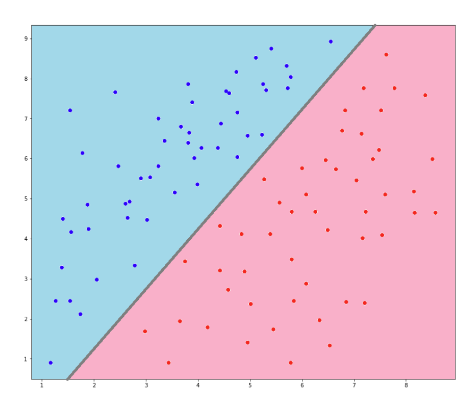
 
 Für das Traning wählt man eine Fehlerfunktion, wie z.B. den quadrierten Fehler $E^{(i)}$ für den Datenpunkt, $(x^{(i)}, y^{(i)})$ gegeben durch 
 
 <p style="text-align: center;">$E^{(i)}=\frac 12 (y^{(i)} - f(x^{(i)}))^2$</p>
 
 und passt iterativ über alle Datenpunkte $(x^{(i)}, y^{(i)})$ für $i \in \{1,...,k\}$ des Datensatzes (innere Schleife im Code) und mehrere Durchgänge hinweg (äußere Schleife im Code) ausgehend von einer (oft zufälligen) initialen Wahl, die Parameter $w_0, w_1, ..., w_n$ mit der Regel 
 
 <p style="text-align: center;">$w_j \leftarrow w_j - \eta \times \frac {d}{dw_j}E^{(i)}$</p>
 
an (innere Schleife im Code).

1. Bestimmen Sie die allgemeine Ableitung des quadratischen Fehlers bzgl. des i-ten Datenpunkts nach allen Parametern $w_j$ für $j \in \{0,...,n\}$. Es genügt, wenn sie die Fällle $j=0$ und $j>0$ explizit betrachten.
2. Implementieren Sie den Traningsalgorithmus des Adalines.
3. Implementieren Sie einen Algorithmus, der bestimmt wie viel Prozent der Daten korrekt klassifiziert wurden. Achtung: Zum Lernen wird Funktion f angepasst, jedoch wird die tatsächliche Anwendung die volle Funktion g verwendet!
4. Plotten Sie den Datensatz `adaline.csv`. Was fällt Ihnen auf?
5. Testen und Evaluieren Sie das Adaline bzgl. des Datensatzes `adaline.csv`.
6. Konstruieren und plotten Sie einen Datensatz, bei dem Ihnen als Mensch eine Klassifikation der Datenpunkte leicht fällt, wo das Adaline jedoch versagt. Warum versagt die Methode in diesem Fall? Beschreiben Sie einen möglichen Ansatz zur Lösung des Problems (z.B. Transformation der Daten, Anpassungen der Methode...).
7. *Bonusaufgabe*: Suchen Sie sich einen frei verfügbaren Datensatz mit einem Klassifikationsproblem und wenden Sie Ihre Implementierung des Adaline darauf an.


# Dokumentation und SageMath Skript

*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*

**Hinweis: Die Ausführung des Skriptes kann aufgrund der Erstellungen von GIFs bis zu > 1:30 Minuten dauern! Aus diesem Grund wurden auch die Anzahl an Frames pro GIF auf maximal 50 reduziert.**

## Problembeschreibung

In diesem Projekt soll das Neuronale Netz ADALINE implementiert werden. Dieses soll dann anhand von vorgegebenen Datenpunkten eine lineare Funktion so verbessern, dass diese die Punkte in zwei Kategrorien einsortiert. Im Anschluss soll dann geprüft werden, wie viele Datenpunkten korrekt durch die Funktion einklassifiziert worden sind. Hieran kann man dann feststellen, ob das Adaline funktioniert oder ob es noch Anpassungen an der Verbesserungsschrittweite bedarf, oder ob der erlaubte Durchschnittsfehler noch weiter heruntergesetzt werden muss. Ebenso muss geprüft werden, ob die vorhandenen Daten gut aufbereitet sind oder ob sie überhaupt durch das ADALINE klassifiziert werden können. Des Weiteren ist zu Beachten, dass der Lernalgorthimus nur eine angemessene Zeit benötigt.

All dies muss in der Implementierung dieses Problems beachtet werden.

## Mathematisches Modell

Als Mathematisches Modell wird das Adaline Modell verwendet. Der Name steht hierbei für ADAptive LInear NEuron und wurde 1959 entwickelt.

Das ADALINE funktionert folgendermaßen:
1. Einlesen von Datenpunkten, die als Datengrundlage dienen
2. Erstellen einer linearen Funktion mit zufällig gewählten Parametern für Steigung und y-Achsen Schnittpunkt.
3. Iteratives anwenden des Lernalgorithmusses solange der Durchschnittsfehler (definiert in $\gamma$) nocht nicht unterschritten ist

    a. Iteratives verbessern der Funktionsparameter (Steigung und y-Achsenschnitt) über alle zuerst eingelesenen Datenpunkte. Hierfür werden alle Datenpunkte in die abgeleitete Fehlerfunktion E eingesetzt und der daraus entstehende Gradient mit dem jeweiligen Funktionsparameter und der Verbesserungsschritteweite (definiert in $\eta$) verrechnet.
    
   b. Folge: Funktion verbessert sich mit jedem Datenpunkt. <br>
  <br>  
4. Sobald die Funktion den Durchschnittsfehler unterschritten hat, erhält man eine Funktion die die Datenpunkte in zwei Kategorien einkategorisiert.

## Implementierung in SageMath & Analyse und Deutung der Ergebnisse

**Aufgabe 1**

In folgender Methode findet man die Ableitungen der Fehlerfunktion. Je nachdem welcher Index übergeben wird, wird die entsprechende Funktion ausgewählt. 

- Index = 0: Ableitung nach w0
- Index = 1: Ableitung nach w1
- Index = 2: Ableitung nach w2

Der Rückgabewert ist dann das Ergebnis (Gradient), wenn man die Daten des Punktes und die Werte der aktuellen linearen Funktion einsetzt.

In [2]:
def E(index, values, wList):
        
    if index == 0:
        # derived from w0 
        diff = -values['y'] + w0 + w1 * values['x1'] + w2 * values['x2']
    elif index == 1:
        # derived from w1
        diff = values['x1'] * (-values['y'] + w0 + w1 * values['x1'] + w2 * values['x2'])
    elif index == 2:
        # derived from w2
        diff = values['x2'] * (-values['y'] + w0 + w1 * values['x1'] + w2 * values['x2'])
    
    # return gradient
    return diff(w0 = wList[0], w1 = wList[1], w2 = wList[2])

**Aufgabe 2**

Hier werden alle Parameter definiert und mit Startwerten initialisiert. 

Die Werte `w0, w1, w2` werden benötigt um die Funktion zu definieren und die Punkte somit in zwei Kategorien einzuteilen.Für eine bessere Bearbeitung werden diese der Reihe nach in eine Liste gepackt `wList` und mit Startwerten initialisiert.

Die Liste `dict_values` wird dazu benötigt, um alle Punkte und deren Klassifikation aus der csv Datei zu speichern. Das `eta` ($\eta$) definiert unsere Verbesserungsschrittweite, um die Funktion in jeder Iteration zuverbessert (oder verschlechtert). 

`gamma` ($\gamma$) definiert den maximalen Durchschnittsfehler über alle Punkte, die die Funktion am Ende des Lernalgorithmus maximal haben darf.

In [3]:
# define variables
w0, w1, w2 = var('w0, w1, w2')

# add w parameters to one list -> better for iteration
# start values = 1
wList = [1, 1, 1]

# dictonary to storage all points from csv file
dict_values = []

# define value for eta
eta = 0.0002

# define gamma 
gamma = 0.02

Die Methode `f(x)` summiert und multipliziert die Werte des Punktes und der Geraden nach der oben definerten Vorgehensweise. Hiermit kann dann eine Klassfikation mit Hilfe der erlernten Funktion durchgeführt werden.

In [4]:
def f(value, wList):
    
    result = wList[0] + wList[1] * value['x1'] + wList[2] * value['x2']
    
    return result

Die Methode `alpha(x)` kategorisiert nach den oben beschriebenen Kriterien einen Wert in -1 oder 1 ein.

In [5]:
def alpha(x):
    result = -1
    
    if x > 0:
        result = 1
        
    return result

Die Methode `g(x)` fasst die Funktionen `f(x)` und `alpha(x)` zusammen und führt diese nacheinander aus.

In [6]:
def g(x, wList):
    return alpha(f(x, wList))

Die Methode `createFunktion(w0, w1, w2)` erstellt aus den übergebenen Parametern eine Gerade und gibt diese als Funktion zurück.

In [7]:
def createFunction(w0, w1, w2):
    
    # solved for 0
    function = (w0 + w1 * x) / -w2
    
    return function

Die Methode `plotAll()` sorgt dafür, dass ein komplettes Koordinatensystem mit allen Punkten und der Ausgleichsgeraden geplottet wird. Die Punkte werden ebenfalls nach ihrer Kategorie bunt gefärbt (-1 = rot, 1 = blau).

In [8]:
def plotAll(wList):

    # graphics object
    g = Graphics()

    # add linear function plot
    g += plot(createFunction(wList[0], wList[1], wList[2]), (x, 0, getHighestPointInList(dict_values)), ymin = 0, ymax = getHighestPointInList(dict_values), fill='min', fillalpha=0.1, fillcolor='red', color='grey', thickness=2)
    g += plot(createFunction(wList[0], wList[1], wList[2]), (x, 0, getHighestPointInList(dict_values)), ymin = 0, ymax = getHighestPointInList(dict_values), fill='max', fillalpha=0.1, fillcolor='blue', color='grey', thickness=2)

    # add all points and color them in the right color
    for value in dict_values:
        if value['y'] < 0:
            pointsColor = 'red'
        else:
            pointsColor = 'blue'
            
        g += point((value['x1'], value['x2']), color = pointsColor)

    return g

Die Methode `readData(filepath)` liest alle Daten der übergebenen csv Datei ein und speichert diese als Dictonary in der Liste `dict_values` ab. Nachdem alle Daten eingelesen worden sind, gibt die Methode die Liste mit allen Punkte zurück.

In [9]:
def readData(filepath):
    
    # read data from file
    with open(filepath, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        
        # add all values of a point in a dictonary and add them to the dict_values list
        for row in reader:
            values = row[0].split(",")
            dict_values.append({
                'y': float(values[0]),
                'x1': float(values[1]),
                'x2': float(values[2])
            })
            
    return dict_values

Die Methode `mixData(dict_values)` mischt die übergebene Liste einmal durch, sodass keine Sortierung nach Kategorien mehr vorliegt. Die Methode sortiert nun die Elemente immer abwechselnd in ihrerer Kategorie.

Beispiel:

Punkt 1: Kategorie 1

Punkt 2: Kategorie -1

Punkt 3: Kategorie 1

....

In [10]:
def mixData(dict_values):
    
    result = []
    
    for index in range(len(dict_values) / 2):
        result.append(dict_values[index])
        result.append(dict_values[len(dict_values) - index - 1])
    
    return result

Die Methode `mixDataWithoutSorting(dict_values)` mischt die übergebene Liste einmal zufällig durch. So liegt nach dem Aufruf keine Sortierung mehr in der Liste `dict_values` vor.

In [11]:
def mixDataWithoutSorting(dict_values):
    
    random.shuffle(dict_values)
    
    return dict_values
    

Die Methode `recalculate(values)` nimmt für alle w's eine Neuberechung vor. Hierfür wird die Fehlerfunktion ausgewertet und anschließend mit dem alten `w` und dem oben definerten `eta` verrechnet.

In [12]:
def recalculate(values, wList):
    for index in range(3):
        wList[index] -= eta * E(index, values, wList)
    
    return wList

Die Methode `terminate_condition (dict_values)` stellt die Abbruchbedingung für den Lernalgorithmus da. Wenn diese False zurückgibt, dann ist der Lernalgorithums abgeschlossen, weil der Durchschnittsfehler kleiner ist als in `gamma` definiert. Liefert sie True, dann ist die Fehler noch zu groß und der Algorithmus läuft weiter.

In [13]:
def terminate_condition (dict_values, wList):
    
    result = 0;
    
    # count all wrong points
    for value in dict_values:
        result += abs(value['y'] - alpha(f(value, wList)))
    
    # create average
    result *= 1 / len(dict_values)
    
    if result > gamma:
        value = True
    else: 
        value = False
    
    return value 

Diese Hilfsmethode findet den größten y-Wert in den übergebenen Punkten. Die Methode wird benötigt, um eine richtige Skalierung des Koordinatensystems zu gewährleisten.

In [14]:
def getHighestPointInList(dict_values):
    
    highest = 0
    
    for value in dict_values:
        highest = max(highest, value['x1'])
        
    return highest + 1

Die Methode `runProgramm(datasetPath, dict_values, gif_path)` startet den Lernalgorithmus.

In [15]:
def runProgramm(datasetPath, dict_values, gif_path):
    dict_values.clear()
    wList = [1, 1, 1]
    dict_values = readData(datasetPath)

    
       # HIER KOENNEN DIE VERSCHIEDENEN
       # SORTIERUNGEN GEWAEHLT WERDEN!

       # 1. KEINE SORTIERUNG
       # 2. ABWECHSELND KATEGORIEN

    # dict_values = mixDataWithoutSorting(dict_values)
    # dict_values = mixData(dict_values)

    plots = []

    counter = 0
    
    t0 = time.time()

    while terminate_condition(dict_values, wList) and counter < 100:
        for values in dict_values:
            wList = recalculate(values, wList)

        plots.append(plotAll(wList))
        counter += 1
    
    t1 = time.time()
    
    if counter == 100:
        print("Gestoppt durch die Obergrenze an Auswertungen.")
    else:
        print("Lernalgorithmus abgeschlossen!")

    print("Dauer (in Sekunden): " + str(t1-t0))
    
    t1 = time.time()
    
    if len(plots) > 50:
        b = animate(plots[len(plots)-50: len(plots)])
    else:
        b = animate(plots)
        
    b.gif(savefile=gif_path, delay=10, iterations=0, show_path = True)
    
    t2 = time.time()
    
    print("Dauer für Plot (in Sekunden): " + str(t2-t1))
    
    t1 = time.time()
    
    wList=[1,1,1]
    
    graph = evaluateEfficiency(dict_values, wList)
    
    t2 = time.time()

    print("Dauer für Analyse: " + str(t2-t1))
    
    return [b, graph]

**Aufgabe 3**

Diese Methode, `evaluateEfficiency(dict_values)` lässt die Simulation unter gleichen Bedinungen nocheinmal laufen und schreibt dabei eine Analyse. Sie wertet aus, wie viele Punkte nach jedem Durchlauf der Datenliste richtig bzw. falsch kategorisiert wurden und gibt diese Effizienz als Graph aus. Aus diesem Graphen kann man dann ablesen, ob sich die Funktion im Laufe des Lernprozesses verbessert oder verschlechtert hat und wie schnell die Funktion gelernt hat.

In [16]:
 def evaluateEfficiency(dict_values, wList):
    pts = []
    counter = 0
    run = 0

    while terminate_condition(dict_values, wList) and counter < 100:
        correctlyEvaluated = 0
        counter += 1
        for values in dict_values:
            if g(values, wList) == values['y']:
                correctlyEvaluated += 1
        pts.append((run, ((100 * correctlyEvaluated) / len(dict_values))))
        
        run += 1
        for values in dict_values:
            wList = recalculate(values, wList)
    
    
    graph = list_plot(pts, color='blue', plotjoined = True, ymin = 0, ymax = 100, frame = True, axes_labels=["Anzahl Auswertungen der gesamten Punkteliste", "Anteil richtig kategoriesierter Punkte"], fontsize = 8)
    
    return graph

 **Aufgabe 4**
 
 Folgender Programmabschnitt für das Verfahren für die vorgebenene `adaline.csv` Daten einmal durch und protokolliert die Veränderung in einem GIF. Hierbei werden immer alle Punkte und die aktuelle Ausgleichsgerade dargestellt. Im Laufe des GIFs kann man dann sehen wie sich die Funktion über die Anzahl an Interationen verbessert hat.

Lernalgorithmus abgeschlossen!
Dauer (in Sekunden): 2.860543727874756
Animation saved to file /home/simgae/Aufgaben_Vorlesung_4/simulation-one.gif.
Dauer für Plot (in Sekunden): 20.075766801834106
Dauer für Analyse: 1.5965898036956787


Animation with 35 frames
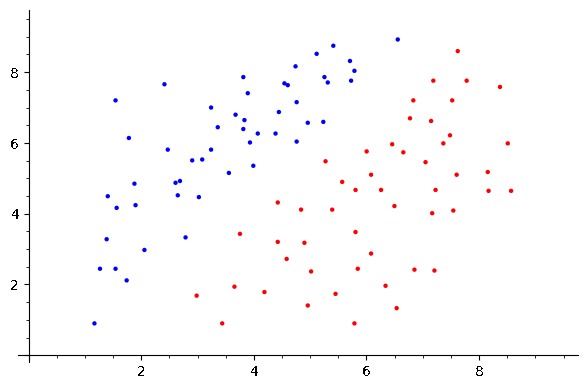

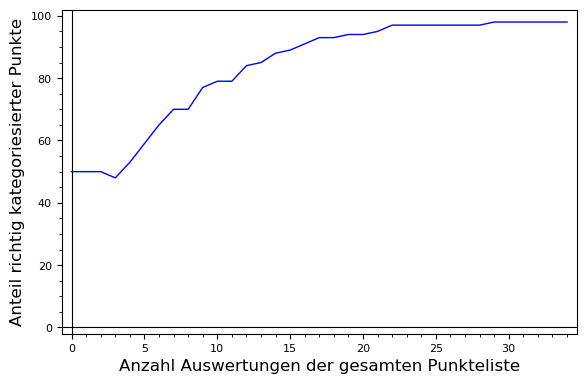

In [17]:
graphs = runProgramm("adaline.csv", dict_values, "simulation-one.gif")
graphs[0]
graphs[1]

## Deutung und Analyse der Ergebnisse des Adalines bzgl. des Datensatzes `adaline.csv`

**Aufgabe 5**

Durch verschiedene Durchläufe mit unterschiedlichen initzialen Zuständen haben wir erkannt, dass die Funktion sehr unterschiedlich lernt. So spielen folgende Kriterien einen großen Einfluss auf die Dauer und Qualität des Lernalgorithmus:

- Wahl der Startparameter - Initzialwerte für die Gerade, $\eta$ und $\gamma$
- Wahl der Sortierung des Datensets

**So zeigten sich folgende Besonderheiten:**

**Wahl der Sortierung des Datensatzes**

$\eta = 0.001 = \gamma$

*Sortiert nach Kategorien*

Wenn das Datenset nach Kategorien sortiert ist, so folgt die Lernkurve einer Kurve. Sie nimmt am Anfang linear zu und flacht dann ab ca. 90% (Durchlauf 9 (Datenset wurde 9 mal ausgewertet)) ab und steigt dann nur noch langsam bis ca. 100% erreicht sind.

*Abwechselnd Sortiert*

Wenn das Datenset abwechselnd nach Kategorien sortiert ist, so steigt die Lernkurve sehr schnell. So ist schon nach dem ersten Durchlauf 90% richtig einkategoriert. Danach dauert es aber umso länger bis 100% richtig einkategoriert sind. Die ca. 100% sind nämlich dann erst nach ca 19 Durchgängen erreicht.

*Komplett ohne Sortierung*

Wenn es absolut keine Sortierung gibt unterscheiden sich die Dauer und die Prozentwerte völlig. So kann es sein, dass der Lernalgorithmus genauso schnell ist wie in den obigen Beispielen oder er in einen "Dauerdurchschnittsfehler" fällt und so ein richtiges Ende nie erreicht wird. Aus diesem Grund wurde auch die Obergrenze von maximal 100 Auswertungen der Punkteliste eingeführt. Allgemein verläuft hier die Lernkruve ähnlich zu der ersten, aber es wird hier nie die 100% korrete Einsortierung erreicht.

**Wahl von $\eta$ und $\gamma$**

$\eta$ *zu groß / hier getestet mit > 0.3*

Wenn $\eta$ zu groß gewählt ist, dann kann es dazu kommen, dass die Funktion im Lernprozess immer über die Punkte hinweg springt. Dies führt dazu, dass der Lernprozess nicht funktioniert und die Funktion nicht die Punkte in zwei Kategorien teilt. Dies ist besonders stark zu beobachten, wenn wie z.B. in Aufgabe 7 die Punkte sehr eng aneinander liegen.

$\gamma$ *zu groß / hier getestet mit > 0.3*

Wenn $\gamma$ zu groß ist, dann wird der Lernprozess führzeitig abgebrochen. Denn mit einem zu großen $\gamma$ beendet man den Algorithmus mitten im Lernprozess. Mittels $\gamma$ kann man die Genauigkeit des Prozesses definieren.

**Aufgabe 6**

Gestoppt durch die Obergrenze an Auswertungen
Dauer (in Sekunden): 3.239514112472534
Animation saved to file /home/simgae/Aufgaben_Vorlesung_4/simulation-two.gif.
Dauer für Plot (in Sekunden): 24.261414766311646
Dauer für Analyse: 1.9642932415008545


Animation with 50 frames
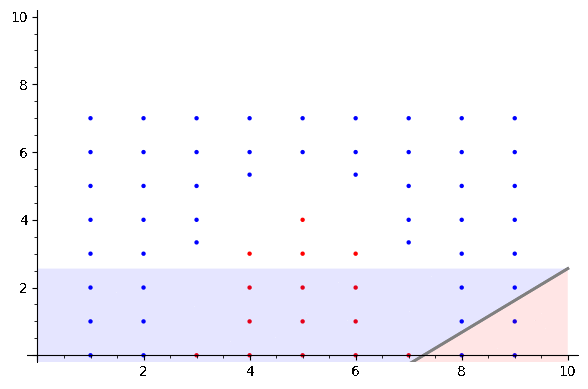

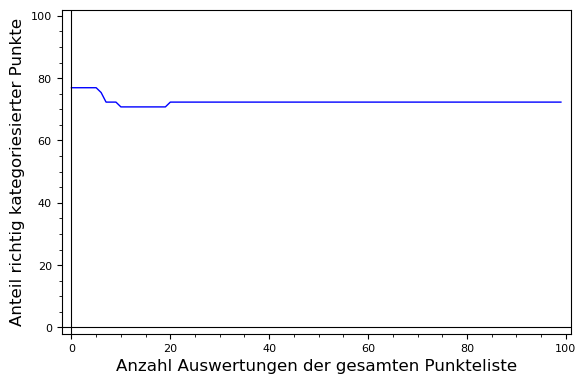

In [18]:
graphs = runProgramm("AdalineTeilaufgabe06.csv", dict_values, "simulation-two.gif")
graphs[0]
graphs[1]

*Inhalt folgt*

**Aufgabe 7**

Gestoppt durch die Obergrenze an Auswertungen
Dauer (in Sekunden): 8.351831197738647
Animation saved to file /home/simgae/Aufgaben_Vorlesung_4/simulation-three.gif.
Dauer für Plot (in Sekunden): 44.863648653030396
Dauer für Analyse: 6.636778116226196


Animation with 50 frames
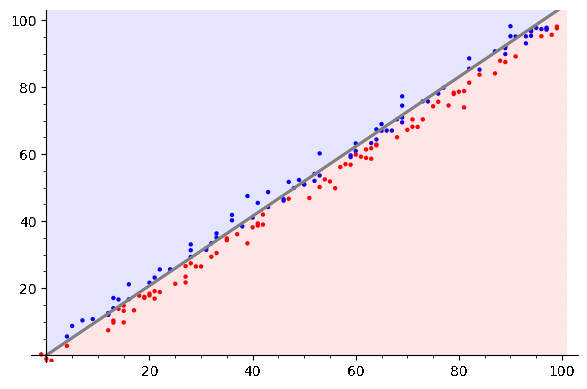

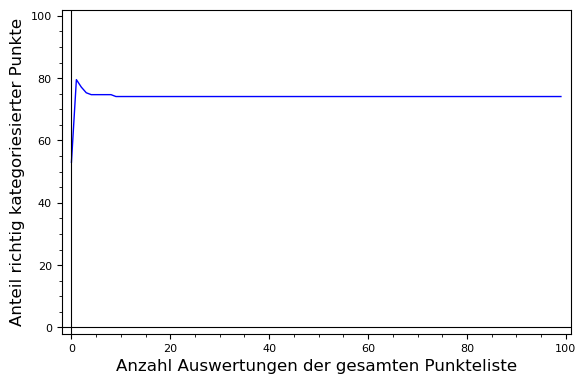

In [19]:
graphs = runProgramm("adalineAlternative.csv", dict_values, "simulation-three.gif")
graphs[0]
graphs[1]

*Inhalt folgt*

## Fazit

Als Fazit lässt sich festhalten, dass der Adaline Lernalgorithmus vor allem bei Punkten funktioniert, die sich einfach durch eine Gerade trennen lassen und bei denen die beiden Kategorien nicht zu nah bei einander liegen. Daher eignet sich der Algorithmus nur in speziellen Fällen.

Ebenso bedarf es ein klein wenig Glück und Analyse die genauen Parameter von $\eta$ und $\gamma$ zu treffen, damit man eine Ausgewogenheit zwischen Genauigkeit und Effizienz bekommt. Ebenso ist es zwingend erforderlich eine Obergrenze einzuführen die den Lernalgorithmus nach einer bestimmten Zeit automatisch beendet, da es manchmal vorkommen kann, dass die Funktion in einen "Dauerfehler" fällt und diesen nicht mehr verlässt.

Des Weiteren ist eine vorherige Analyse der vorliegenden Daten notwendig. Mit dessen Qualität steigt oder sinkt die Erfolgswahrscheinlichkeit des Adaline drastisch.

## Arbeitsteilung

Aufteilung nach Aufgaben:

1. Aufgabe: Lucas Wessel
2. Aufgabe: Lucas Wessel & Simon Gärtner
3. Aufgabe: Lucas Wessel
4. Aufgabe: Simon Gärtner
5. Aufgabe: Simon Gärtner
6. Aufgabe: Dejan Sovic
7. Aufgabe: Timo Schmitt

Dokumentation: alle zusammen